In [7]:
from Prototype.edge_gadget_qpu_generator import EdgeGadgetQPUGenerator
from Prototype.crystal_structure import CrystalStructure
import matplotlib.pyplot as plt
import numpy as np

In [8]:
crystal = CrystalStructure.from_file("../../native_crystal_database/three_edges_binary.dat")

qpuGenerator = EdgeGadgetQPUGenerator(
    weights_detuning_fraction=0.1 / max(np.abs(np.array(list(crystal.interactions.values()))).max(), np.abs(np.array(crystal.potentials)).max()),
    next_nearest_neighbour_detuning_correction=0.1,
    crystal=crystal,
    atomic_min_distance=1
)

result = qpuGenerator.convert()

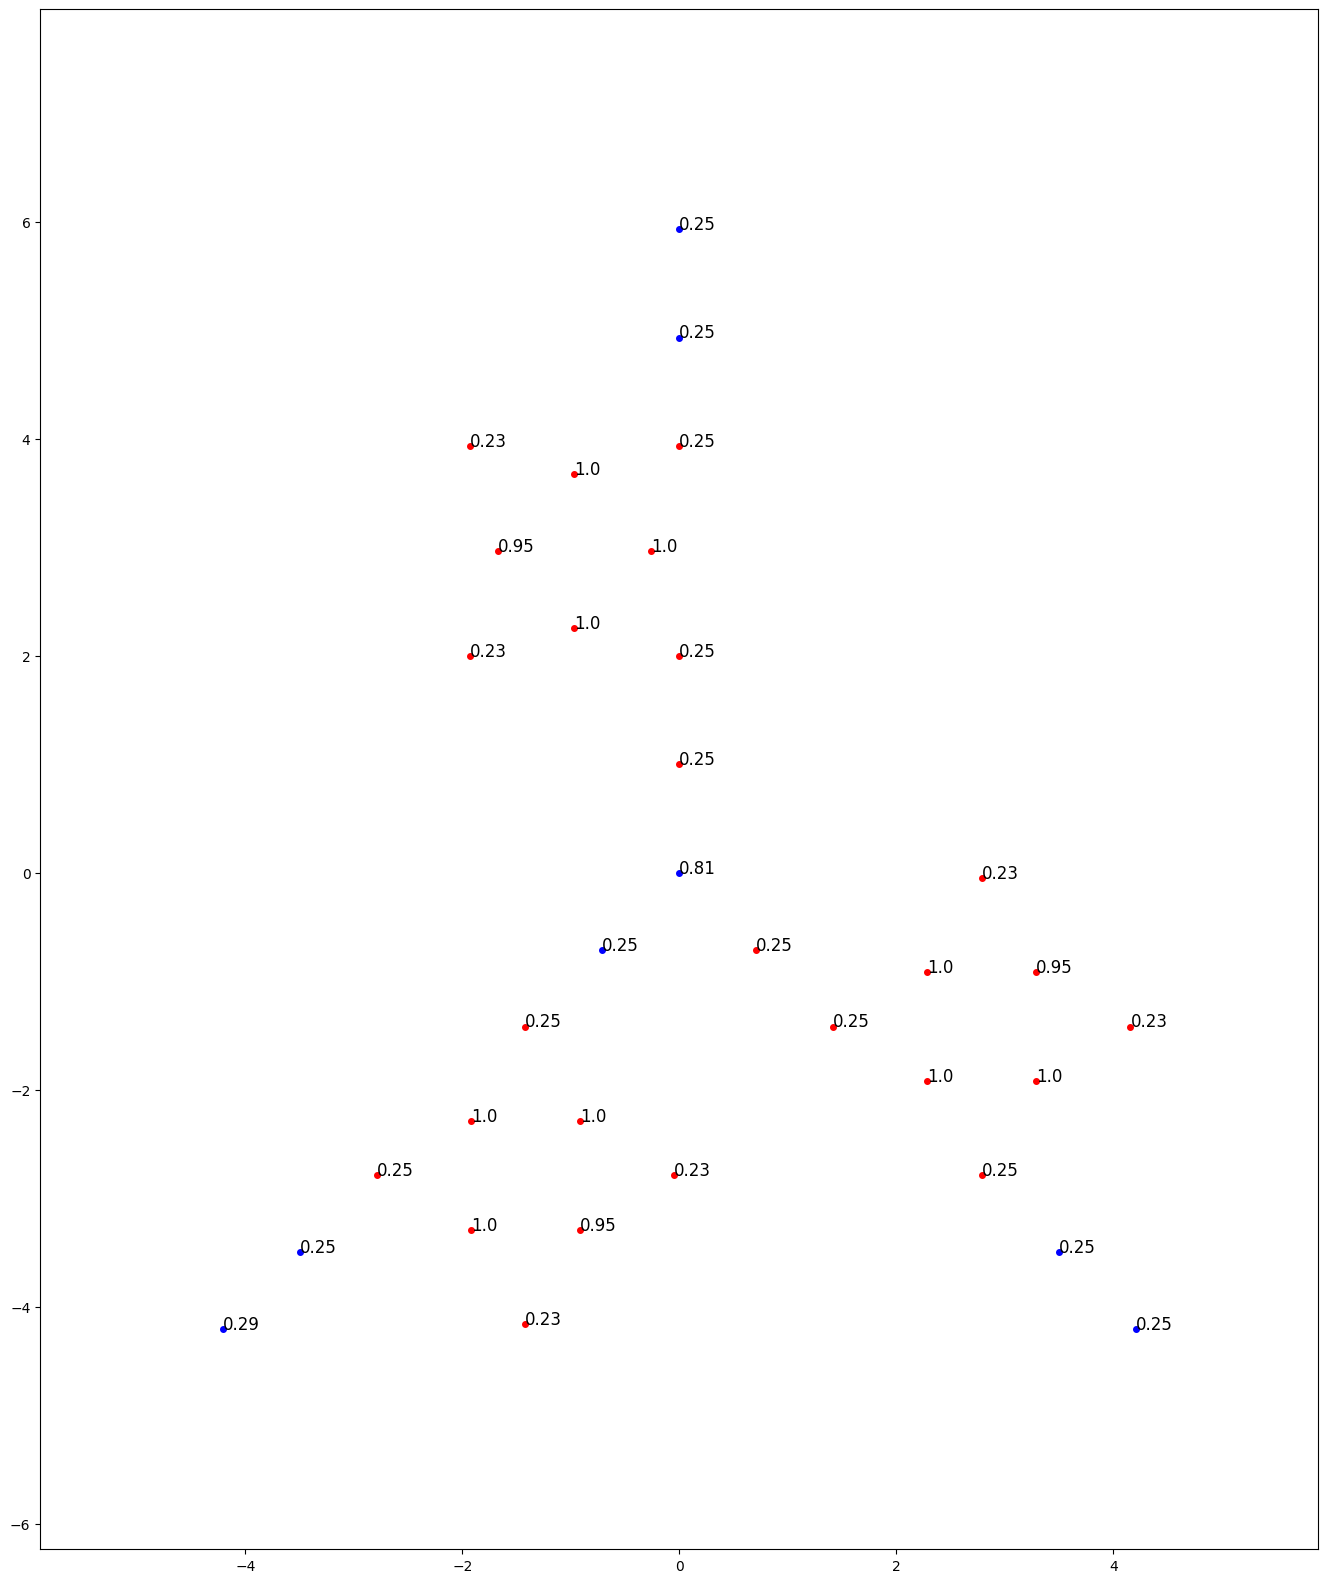

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

atom_specs = result["atom_specs"]
for i in range(len(atom_specs)):
    ax.plot(
        atom_specs[i].getPosition()[0],
        atom_specs[i].getPosition()[1],
        marker = "o",
        markersize = 4,
        color = "red" if atom_specs[i].target == -1 else "blue"
    )
    plt.text(
        atom_specs[i].getPosition()[0],
        atom_specs[i].getPosition()[1],
        str(round(atom_specs[i].getDetuning(), 2)),
        fontdict = {
            "size": 12
        }
    )
ax.set_aspect("equal")
ax.margins(0.2, 0.2)
plt.show()

In [10]:
import math
p = np.array([a.getPosition() for a in atom_specs])
math.atan2(*p.mean(axis=0)[::-1]) * 180 / np.pi

-77.75027804323275